In [13]:
import numpy as np

# Define parameters
T = 1000  # Number of time periods
beta_0 = 0.01
beta_1 = 0.9
gamma_0 = 0.01
gamma_1 = 0.9
sigma_epsilon = 0.1
sigma_u = 0.2
sigma_eta = 0.15

# Initialize arrays
r = np.zeros(T)
mu = np.zeros(T)
l = np.zeros(T)
eta = np.zeros(T)
epsilon = np.random.normal(0, sigma_epsilon, T)
u = np.random.normal(0, sigma_u, T)

# Generate data
for t in range(1, T):
    eta[t] = gamma_1 * (l[t] - l[t-1])
    mu[t] = beta_0 + beta_1 * mu[t-1] + u[t]
    l[t] = gamma_0 + gamma_1 * l[t-1] + np.random.normal(0, sigma_eta)
    r[t] = mu[t] + eta[t] + epsilon[t]

# Print the generated data
#print("Generated r:", r)
#print("Generated mu:", mu)
#print("Generated l:", l)
#print("Generated eta:", eta)
#print("Generated epsilon:", epsilon)

Text(0.5, 1.0, 'State Space Simulation')

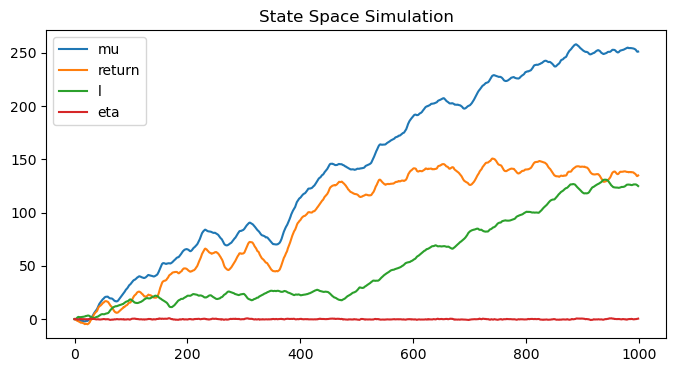

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 4))
plt.plot(mu.cumsum(), label = 'mu')
plt.plot(r.cumsum(), label = 'return')
plt.plot(l.cumsum(), label = 'l')
plt.plot(eta, label = 'eta')
plt.legend()
plt.grid(False)
plt.title('State Space Simulation')

In [15]:
import pandas as pd

import statsmodels.api as sm

X = pd.DataFrame([eta, mu], index = ['eta','mu']).T
y = r

model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          1.939e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        13:52:39   Log-Likelihood:                          878.64
No. Observations:                1000   AIC:                                     -1753.
Df Residuals:                     998   BIC:                                     -1743.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------